# Data Exploration and Cleaning

In [42]:
from pymed import PubMed
import pandas as pd
import numpy as np
import csv

In [5]:
# Import the csv as a dataframe

jneuro = pd.read_csv('jneuro.csv', names=columns)

print(jneuro.shape)
jneuro.head()

(12734, 13)


,pubmed_id,title,abstract,keywords,journal,publication_date,authors,methods,conclusions,results,copyrights,doi,xml
0,32737169,"Erratum: Salido and Ramamurthy, ""Proteoglycan ...",NaN,[],The Journal of neuroscience : the official jou...,2020-08-02,[],NaN,NaN,NaN,NaN,10.1523/JNEUROSCI.1846-20.2020,<Element 'PubmedArticle' at 0x7f18e0bb0a10>
1,32737168,"Erratum: Keitel et al., ""Medial Nucleus Accumb...",NaN,[],The Journal of neuroscience : the official jou...,2020-08-02,[],NaN,NaN,NaN,NaN,10.1523/JNEUROSCI.1829-20.2020,<Element 'PubmedArticle' at 0x7f18e07a1050>
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,[],The Journal of neuroscience : the official jou...,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",NaN,NaN,NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2888-19.2020,<Element 'PubmedArticle' at 0x7f18e07d5b90>
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,[],The Journal of neuroscience : the official jou...,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",NaN,NaN,NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2559-19.2020,<Element 'PubmedArticle' at 0x7f18e07c2a10>
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,[],The Journal of neuroscience : the official jou...,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",NaN,NaN,NaN,Copyright © 2020 Metzger et al.,10.1523/JNEUROSCI.0279-20.2020,<Element 'PubmedArticle' at 0x7f18e07cc710>


### 1. Data types

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

In [7]:
jneuro.dtypes

pubmed_id            object
title                object
abstract             object
keywords             object
journal              object
publication_date     object
authors              object
methods             float64
conclusions         float64
results              object
copyrights           object
doi                  object
xml                  object
dtype: object

In [8]:
jneuro[['methods', 'conclusions']].describe()

,methods,conclusions
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


- **Next step**: change datatypes to its proper form
    1. publication_date : datetime
    2. methods & conclusions : drop since both columns are empty

In [9]:
# Before convertin dtype of'publication_date'
print(jneuro['publication_date'].dtype)

# Convert the date type to datetime64
jneuro['publication_date'] = pd.to_datetime(jneuro['publication_date'])

# After convertin dtype of'publication_date'
print(jneuro['publication_date'].dtype)

object
datetime64[ns]


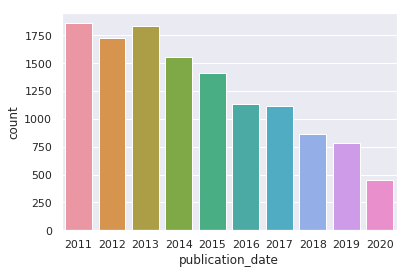

In [10]:
sns.countplot(jneuro['publication_date'].dt.year)

- Decreased # of total publication each year
    - Is this true? why?

In [44]:
# To do later: Maybe issuing interval or articles per release changed?

In [45]:
jneuro_1 = jneuro.drop(columns=['methods', 'conclusions'])

In [46]:
jneuro_1.dtypes

pubmed_id                   object
title                       object
abstract                    object
keywords                    object
journal                     object
publication_date    datetime64[ns]
authors                     object
results                     object
copyrights                  object
doi                         object
xml                         object
dtype: object

### 2. Take care of empty values

In [50]:
# First, let's use .replace() and substitute ('[]') with np.nan
# To unify the respresentation of empty values

jneuro_1.replace(to_replace='[]', value=np.nan, inplace=True)
jneuro_1.head()

,pubmed_id,title,abstract,keywords,journal,publication_date,authors,results,copyrights,doi,xml
0,32737169,"Erratum: Salido and Ramamurthy, ""Proteoglycan ...",NaN,NaN,The Journal of neuroscience : the official jou...,2020-08-02,NaN,NaN,NaN,10.1523/JNEUROSCI.1846-20.2020,<Element 'PubmedArticle' at 0x7f18e0bb0a10>
1,32737168,"Erratum: Keitel et al., ""Medial Nucleus Accumb...",NaN,NaN,The Journal of neuroscience : the official jou...,2020-08-02,NaN,NaN,NaN,10.1523/JNEUROSCI.1829-20.2020,<Element 'PubmedArticle' at 0x7f18e07a1050>
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,The Journal of neuroscience : the official jou...,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2888-19.2020,<Element 'PubmedArticle' at 0x7f18e07d5b90>
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,The Journal of neuroscience : the official jou...,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",NaN,Copyright © 2020 the authors.,10.1523/JNEUROSCI.2559-19.2020,<Element 'PubmedArticle' at 0x7f18e07c2a10>
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,The Journal of neuroscience : the official jou...,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",NaN,Copyright © 2020 Metzger et al.,10.1523/JNEUROSCI.0279-20.2020,<Element 'PubmedArticle' at 0x7f18e07cc710>


In [51]:
jneuro_1.isnull().mean()

pubmed_id           0.000000
title               0.001885
abstract            0.053322
keywords            0.487514
journal             0.000000
publication_date    0.000000
authors             0.009895
results             0.999921
copyrights          0.515156
doi                 0.000550
xml                 0.000000
dtype: float64

In [53]:
# Drop columns that have high proportion of empty values (>50%)
# and are not necessary information for research trend analysis
# Let's keep the 'keywords' column for now

cols_to_drop = ['results', 'copyrights']
jneuro_1.drop(columns=cols_to_drop, inplace=True)
jneuro_1.isnull().sum()

pubmed_id              0
title                 24
abstract             679
keywords            6208
journal                0
publication_date       0
authors              126
doi                    7
xml                    0
dtype: int64

In [54]:
# Drop more columns which do not provide any info about research content

more_cols_to_drop = ['journal', 'doi', 'xml']
jneuro_1.drop(columns=more_cols_to_drop, inplace=True)
jneuro_1.isnull().sum()

pubmed_id              0
title                 24
abstract             679
keywords            6208
publication_date       0
authors              126
dtype: int64

**2-1. Articles missing title**

In [147]:
jneuro_2 = jneuro_1.copy()

print(jneuro_2.shape)
jneuro_2[jneuro_2.isnull().any(axis=1)].head()

(12734, 6)


,pubmed_id,title,abstract,keywords,publication_date,authors
0,32737169,"Erratum: Salido and Ramamurthy, ""Proteoglycan ...",NaN,NaN,2020-08-02,NaN
1,32737168,"Erratum: Keitel et al., ""Medial Nucleus Accumb...",NaN,NaN,2020-08-02,NaN
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'..."
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa..."
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A..."


In [148]:
# case 1: No title, but abtract exist -> keep the row for now
# case 2: No title, no abstract -> No information to draw, simply drop rows

no_titles = jneuro['title'].isnull()
no_abstracts = jneuro['abstract'].isnull()

jneuro_2 = jneuro_2[~((no_titles) & (no_abstracts))]


print(jneuro_2.shape)
jneuro_2.head()

(12729, 6)


,pubmed_id,title,abstract,keywords,publication_date,authors
0,32737169,"Erratum: Salido and Ramamurthy, ""Proteoglycan ...",NaN,NaN,2020-08-02,NaN
1,32737168,"Erratum: Keitel et al., ""Medial Nucleus Accumb...",NaN,NaN,2020-08-02,NaN
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'..."
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa..."
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A..."


In [149]:
# case 3: Erratum statetment -> drop rows using regular expression: r'Erratum:*'

find_erratum = jneuro_2['title'].str.contains(r'Erratum:*', na=False)

found_erratum = jneuro_2[find_erratum]

jneuro_2.drop(index=found_erratum.index, inplace=True)

print(jneuro_2.shape)
jneuro_2.head()

(12684, 6)


,pubmed_id,title,abstract,keywords,publication_date,authors
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'..."
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa..."
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A..."
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',..."
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'..."


In [150]:
jneuro_2.isnull().sum()

pubmed_id              0
title                 19
abstract             638
keywords            6161
publication_date       0
authors               81
dtype: int64

**2-2. Articles missing abstract**

/home/hyoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


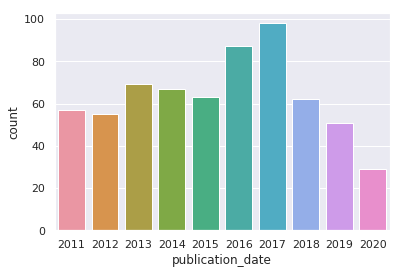

In [151]:
missing_abstract = jneuro_2[no_abstracts]

# 
sns.countplot(missing_abstract['publication_date'].dt.year)

In [152]:
# It's hard to impute an abstract without the entire contents of articles.
# Thus, let's drop these row without abs

jneuro_2.drop(index=missing_abstract.index, inplace=True)

print(jneuro_2.shape)
jneuro_2.head()

(12046, 6)


,pubmed_id,title,abstract,keywords,publication_date,authors
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'..."
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa..."
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A..."
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',..."
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'..."


In [153]:
jneuro_2.isnull().sum()

pubmed_id              0
title                 19
abstract               0
keywords            5536
publication_date       0
authors               38
dtype: int64

## To-dos  for cleaning:

- what's happening with pubmed_id? is it ok to drop this col?
- duplicated values?
- data inconsistency?
- flatten author column? or drop it for now

# research-trend-analysis

Natural Language Processing project:

### Objective
To analyze annual research trend of a specific journal in the last 10 years using techniques we learned from NLP classes.

- **Step 1**: Data mining: data was extracted using [PubMed](https://pubmed.ncbi.nlm.nih.gov/)'s API and an established library, [PyMed](https://github.com/PyMed/PyMed).

- **Step 2**: Data exploration and preprocessing

- **Step 3**: Text representation

- **Step 4**: Information extraction